# NLP Sentiment Analysis
The goal of this project is to build, train, test and deploy an AI model to predict sentiment from thousands of Amazon Echo reviews.

*done by: Mohd Shah B S.Hameed*

---
## Data Exploration

In [1]:
# standard library
import pandas as pd
import numpy as np

In [2]:
# import the Amazon review dataset
amz = pd.read_csv('amazon_reviews.csv')
amz.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [25]:
amz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [26]:
amz.describe(include='all')

,rating,date,variation,verified_reviews,feedback
count,3150.000000,3150,3150,3150,3150.000000
unique,NaN,77,16,2301,NaN
top,NaN,30-Jul-18,Black Dot,,NaN
freq,NaN,1603,516,79,NaN
mean,4.463175,NaN,NaN,NaN,0.918413
std,1.068506,NaN,NaN,NaN,0.273778
min,1.000000,NaN,NaN,NaN,0.000000
25%,4.000000,NaN,NaN,NaN,1.000000
50%,5.000000,NaN,NaN,NaN,1.000000
75%,5.000000,NaN,NaN,NaN,1.000000


In [23]:
amz['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [13]:
amz.query('feedback == 0').head()

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0


In [28]:
# the ratings and feedback based on variation
amz.groupby('variation',as_index=False).agg({'rating':['mean','std','count']})

variation    rating                
                                      mean       std count
0                          Black  4.233716  1.339838   261
1                     Black  Dot  4.453488  1.027660   516
2                    Black  Plus  4.370370  1.158391   270
3                    Black  Show  4.490566  0.996635   265
4                    Black  Spot  4.311203  1.247764   241
5               Charcoal Fabric   4.730233  0.683994   430
6   Configuration: Fire TV Stick  4.591429  0.990751   350
7           Heather Gray Fabric   4.694268  0.647108   157
8                    Oak Finish   4.857143  0.363137    14
9              Sandstone Fabric   4.355556  0.997875    90
10                Walnut Finish   4.888889  0.333333     9
11                         White  4.142857  1.464934    91
12                    White  Dot  4.423913  1.047857   184
13                   White  Plus  4.358974  1.184032    78
14                   White  Show  4.282353  1.278129    85
15                   White  Spot  4.311927  1.222454   109

In [31]:
# Pearsons correlation between ratings and feeback
amz.corr()

,rating,feedback
rating,1.000000,0.861968
feedback,0.861968,1.000000


In [27]:
# the range of dates for the reviews
amz['date'].unique() #= pd.to_datetime(amz['date'])

array(['31-Jul-18', '30-Jul-18', '29-Jul-18', '28-Jul-18', '27-Jul-18',
       '26-Jul-18', '25-Jul-18', '24-Jul-18', '23-Jul-18', '22-Jul-18',
       '21-Jul-18', '20-Jul-18', '19-Jul-18', '18-Jul-18', '17-Jul-18',
       '16-Jul-18', '15-Jul-18', '14-Jul-18', '13-Jul-18', '12-Jul-18',
       '11-Jul-18', '10-Jul-18', '9-Jul-18', '8-Jul-18', '7-Jul-18',
       '6-Jul-18', '5-Jul-18', '4-Jul-18', '3-Jul-18', '2-Jul-18',
       '1-Jul-18', '30-Jun-18', '29-Jun-18', '28-Jun-18', '27-Jun-18',
       '26-Jun-18', '25-Jun-18', '24-Jun-18', '23-Jun-18', '22-Jun-18',
       '21-Jun-18', '20-Jun-18', '19-Jun-18', '18-Jun-18', '17-Jun-18',
       '16-Jun-18', '15-Jun-18', '14-Jun-18', '13-Jun-18', '12-Jun-18',
       '11-Jun-18', '10-Jun-18', '9-Jun-18', '8-Jun-18', '7-Jun-18',
       '6-Jun-18', '5-Jun-18', '4-Jun-18', '3-Jun-18', '2-Jun-18',
       '1-Jun-18', '31-May-18', '30-May-18', '29-May-18', '28-May-18',
       '27-May-18', '26-May-18', '25-May-18', '24-May-18', '23-May-18',
       '22

---
## Data Visualization

In [33]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

# for word cloud library
from wordcloud import WordCloud # create wordcloud object
import string # for punctuations using string.punctuation
import nltk # Natural language toolkit
nltk.download('stopwords')
from nltk.corpus import stopwords # to stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [99]:
# improve visuals
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

### WordCloud For Negative Comments

To create a wordcloud we would need to first remove all punctuations from the comments and create a single str element

In [81]:
# func to clean comments
def clean(comment):
    punc = string.punctuation # string of punctuations
    comment_list = comment.tolist() # convert pd series to list
    comment_join = "".join(comment_list) # create string
    comment_join_clean = [com for com in comment_join if com not in punc]
    comment_join2 = "".join(comment_join_clean) # combine into string
    
    return comment_join2 

In [82]:
# create a string of negative comment
if __name__ == '__main__':
    neg_rev = clean(amz[amz['feedback']==0]['verified_reviews'])

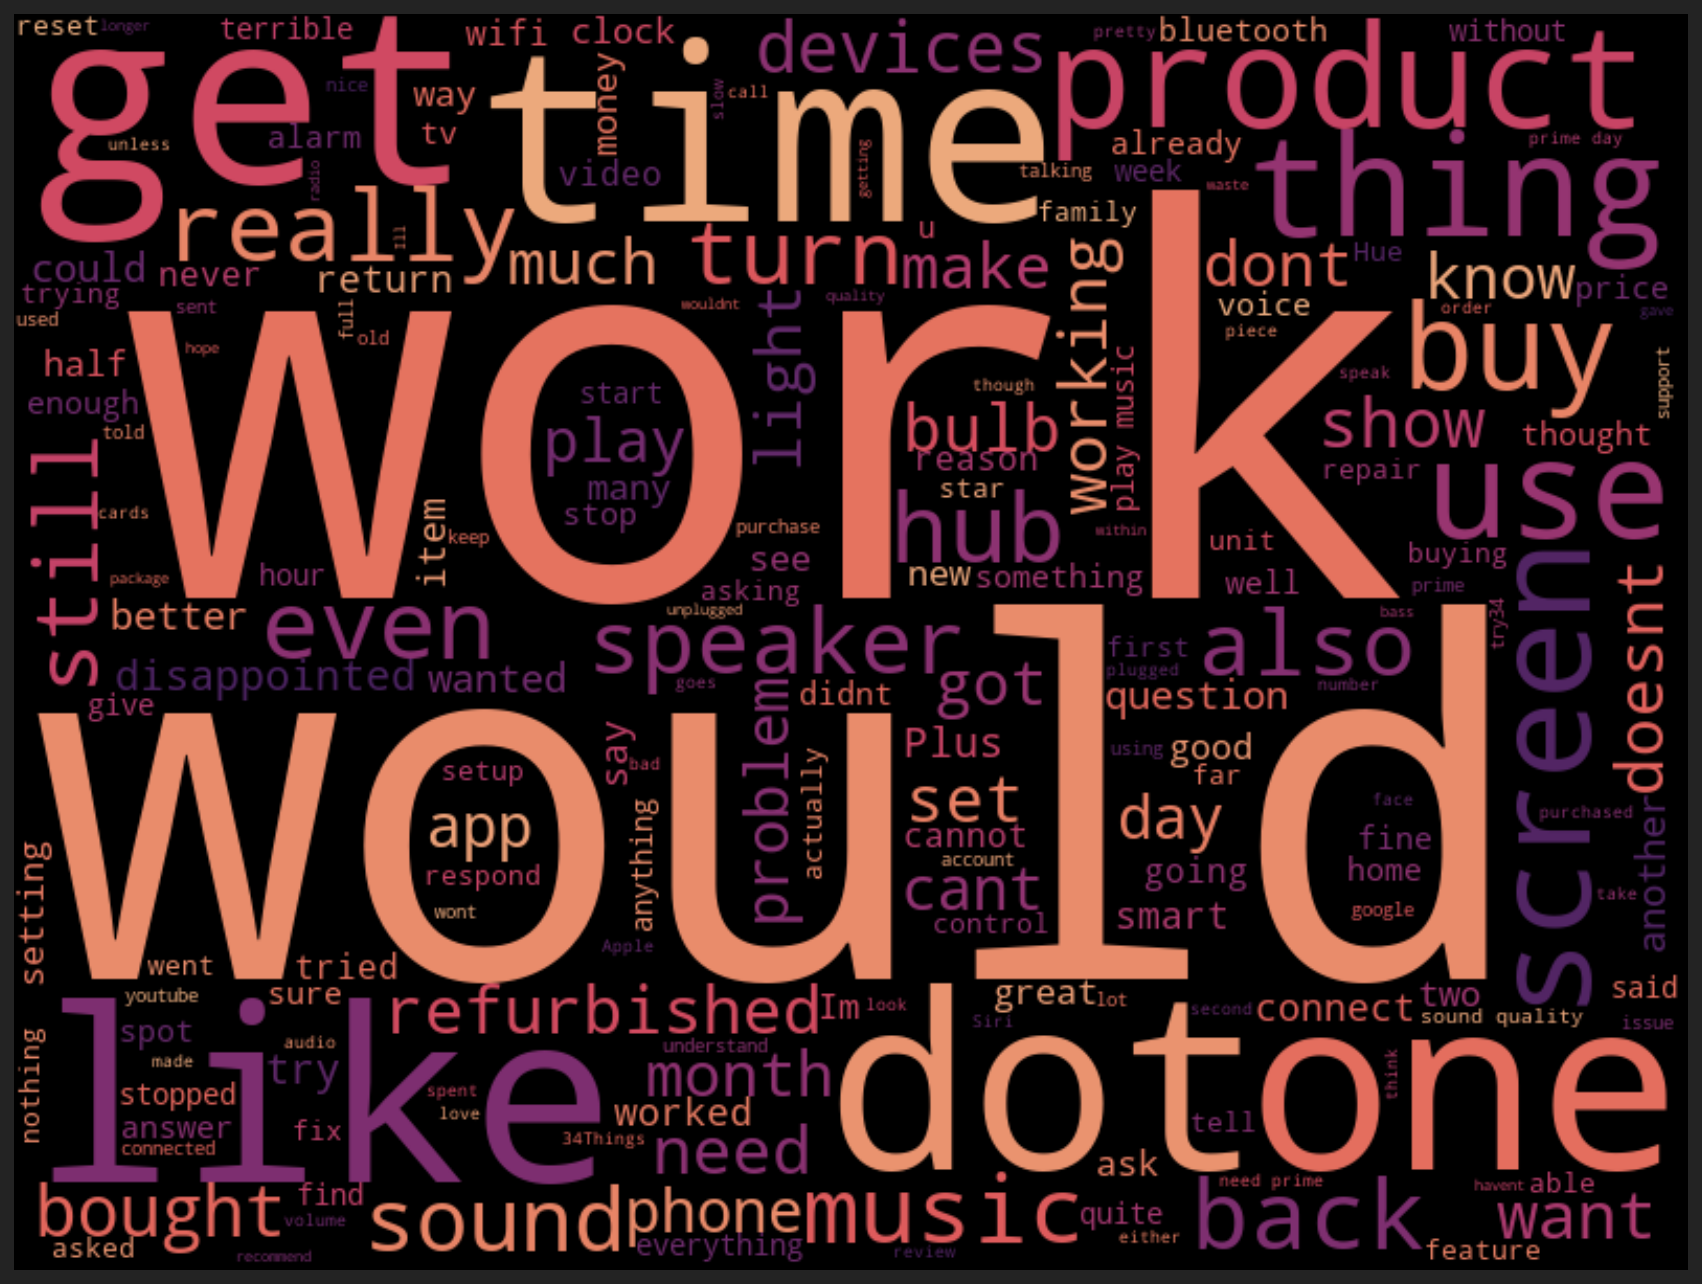

In [135]:
# define the stopwords
stop = stopwords.words('english') + ['Amazon','echo','Alexa','device']
wcloud = WordCloud(background_color='black', 
                   stopwords=stop,
                   colormap = 'flare_r',
                   height = 600,
                   width = 800
                  ) 
# plot the cloud
plt.figure(figsize=(15,20))
plt.imshow(wcloud.generate(neg_rev),interpolation='bilinear') # generate wordcloud
plt.axis('off') # turn off axes
plt.show()

### WordCloud for Positive Comments

In [105]:
# extract all positive comments
if __name__ == '__main__':
    pos_rev = clean(amz.query('feedback==1')['verified_reviews'])

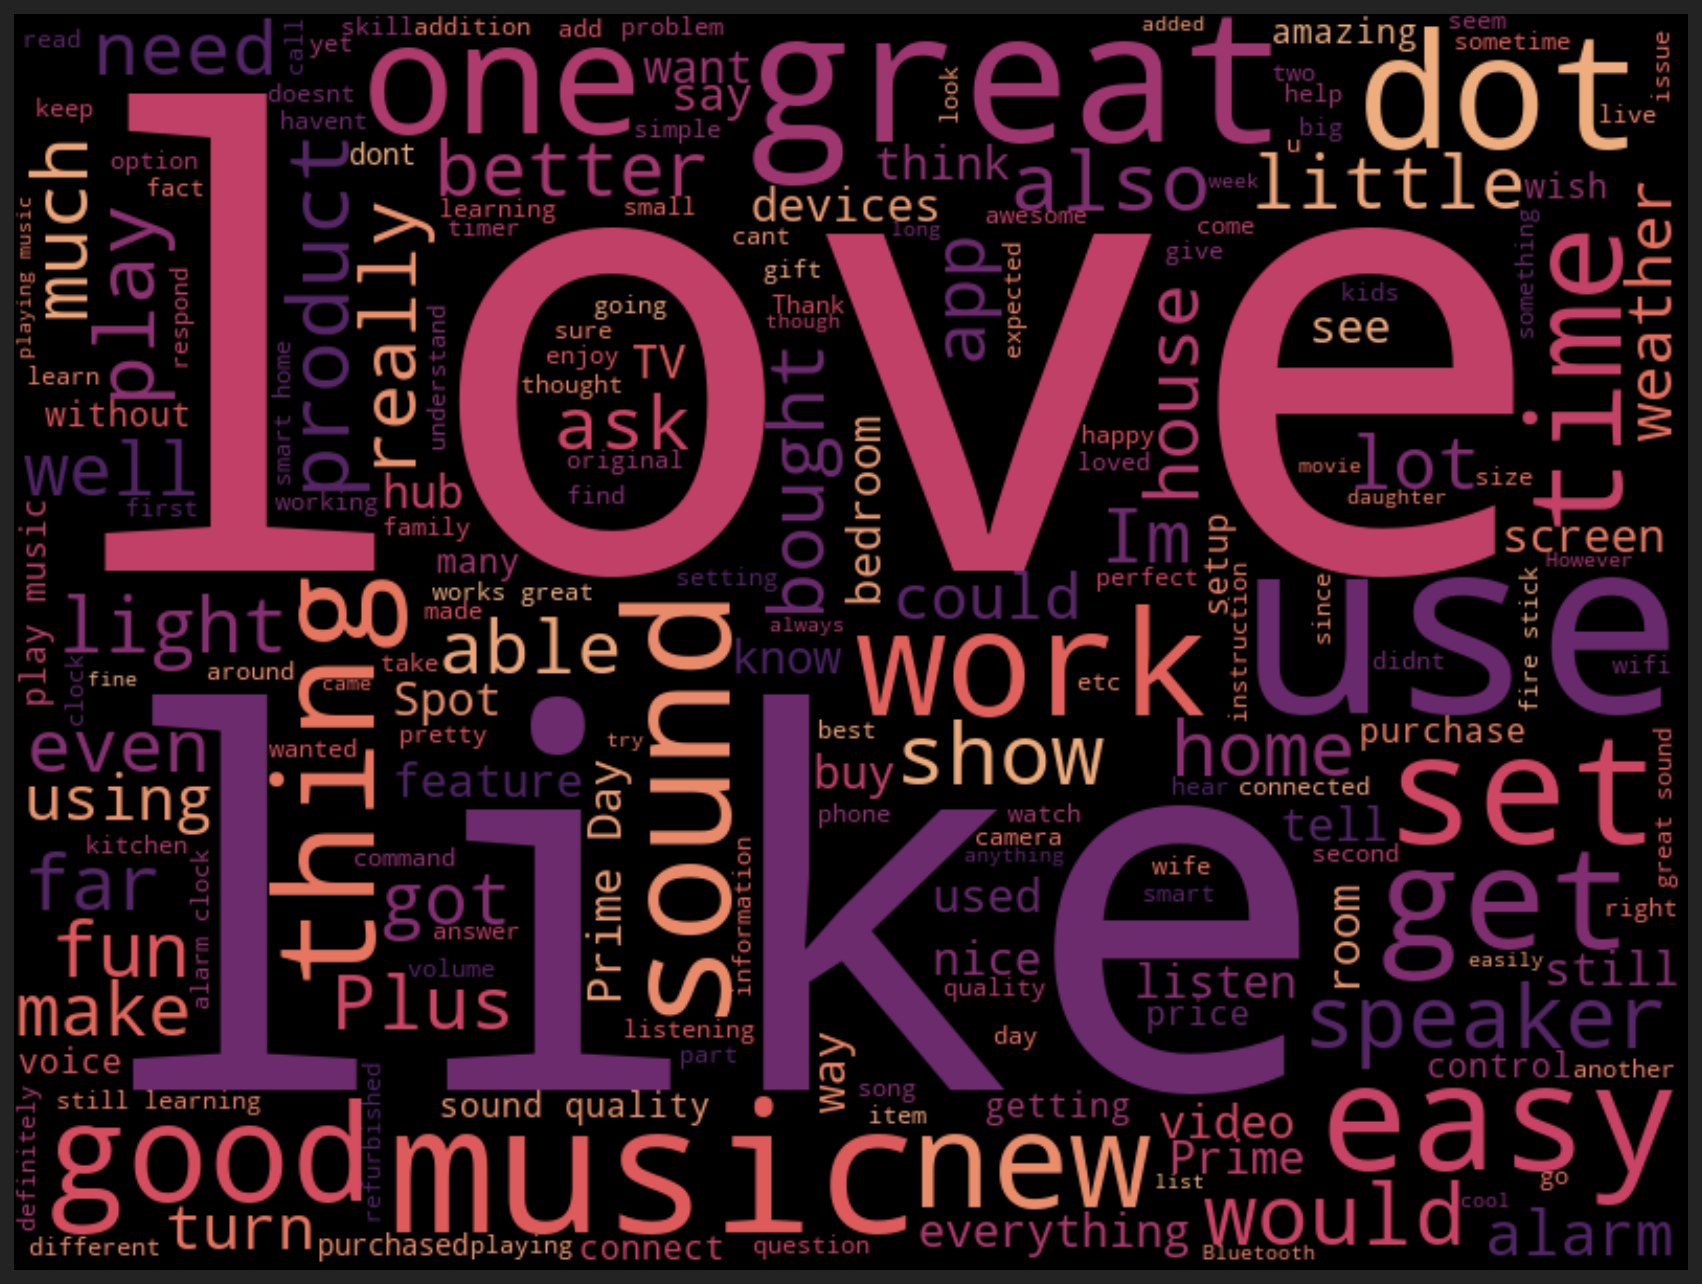

In [136]:
# plot the cloud
plt.figure(figsize=(15,20))
plt.imshow(wcloud.generate(pos_rev),interpolation='bilinear') # generate wordcloud
plt.axis('off') # turn off axes
plt.show()

---
## Prediction Model

In [138]:
# Naive Bayes classification model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

In [143]:
# create a count vectorizor to fit into model
vec_matrix = CountVectorizer().fit_transform(amz['verified_reviews'])
# create dataframe of count vectorizer
X = pd.DataFrame(vec_matrix.toarray())
# add ratings to independent variable X
X['rating'] = amz['rating']
# define dependent variable y
y = amz['feedback']
# preview independent variable
X.head()

,0,1,2,3,4,5,6,7,8,9,...,4035,4036,4037,4038,4039,4040,4041,4042,4043,rating
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [164]:
# split data into test and training set
x_train, x_test, y_train, y_test = train_test_split(np.array(X),np.array(y),test_size=0.2)
print('Number of train sample = ',x_train.shape[0])
print('Number of test sample = ',x_test.shape[0])

Number of train sample =  2520
Number of test sample =  630


### Naive Bayes Model

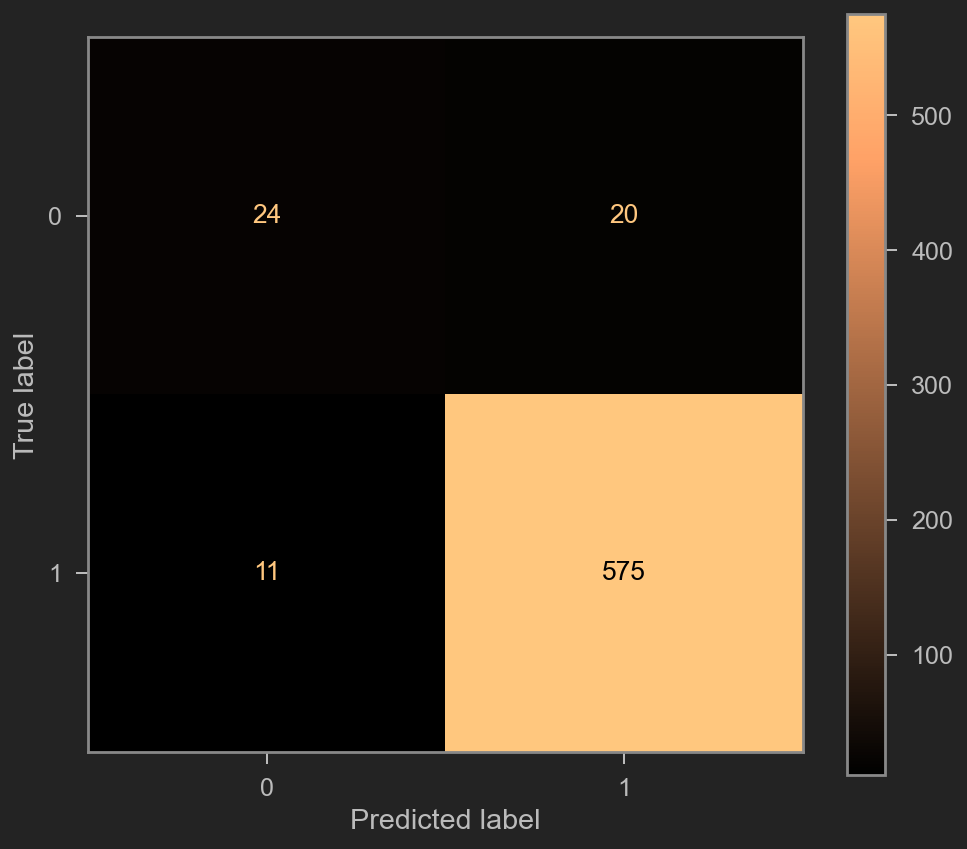

              precision    recall  f1-score   support

           0       0.69      0.55      0.61        44
           1       0.97      0.98      0.97       586

    accuracy                           0.95       630
   macro avg       0.83      0.76      0.79       630
weighted avg       0.95      0.95      0.95       630



In [165]:
from sklearn.naive_bayes import MultinomialNB
# create and fit model object
nbm = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True).fit(x_train,y_train)
# predict test sample
y_nbm = nbm.predict(x_test)
# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_nbm,cmap='copper')
plt.show()
# class report
print(classification_report(y_test,y_nbm))

### Logistic Regression Model

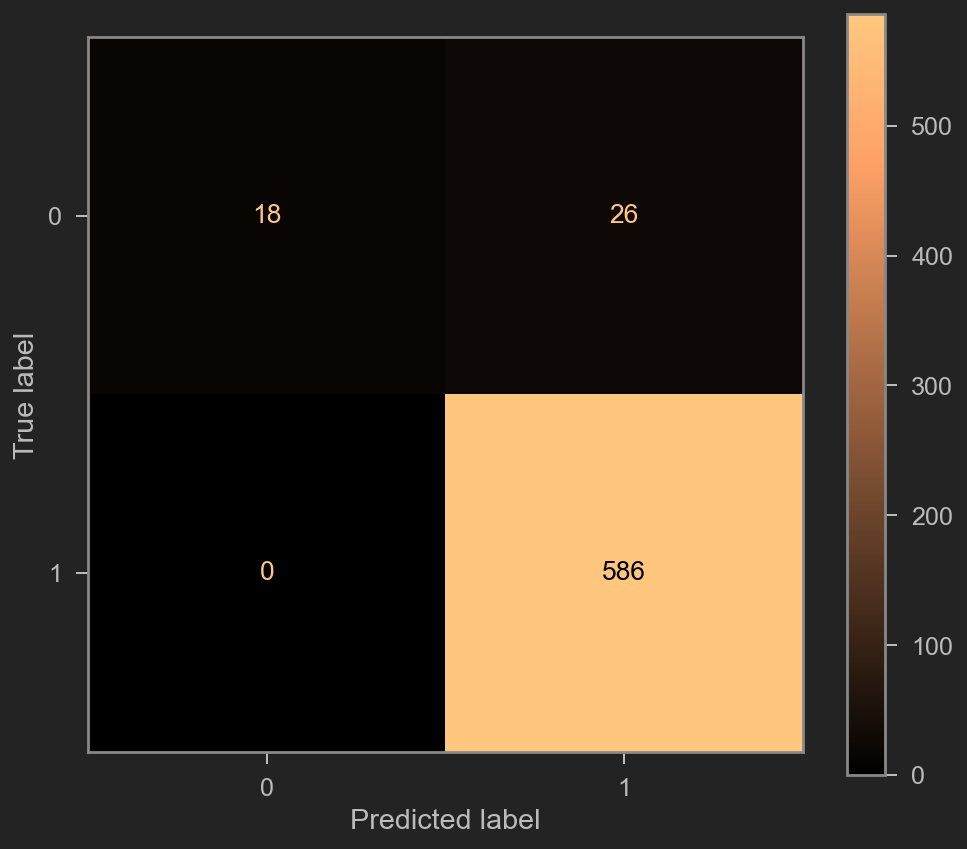

              precision    recall  f1-score   support

           0       1.00      0.41      0.58        44
           1       0.96      1.00      0.98       586

    accuracy                           0.96       630
   macro avg       0.98      0.70      0.78       630
weighted avg       0.96      0.96      0.95       630



In [166]:
from sklearn.linear_model import LogisticRegression
# create and fit model object
lrm = LogisticRegression(C=0.01,solver='liblinear').fit(x_train,y_train)
# predict test sample
y_lrm = lrm.predict(x_test)
# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_lrm,cmap='copper')
plt.show()
# class report
print(classification_report(y_test,y_lrm))

### SVM Model

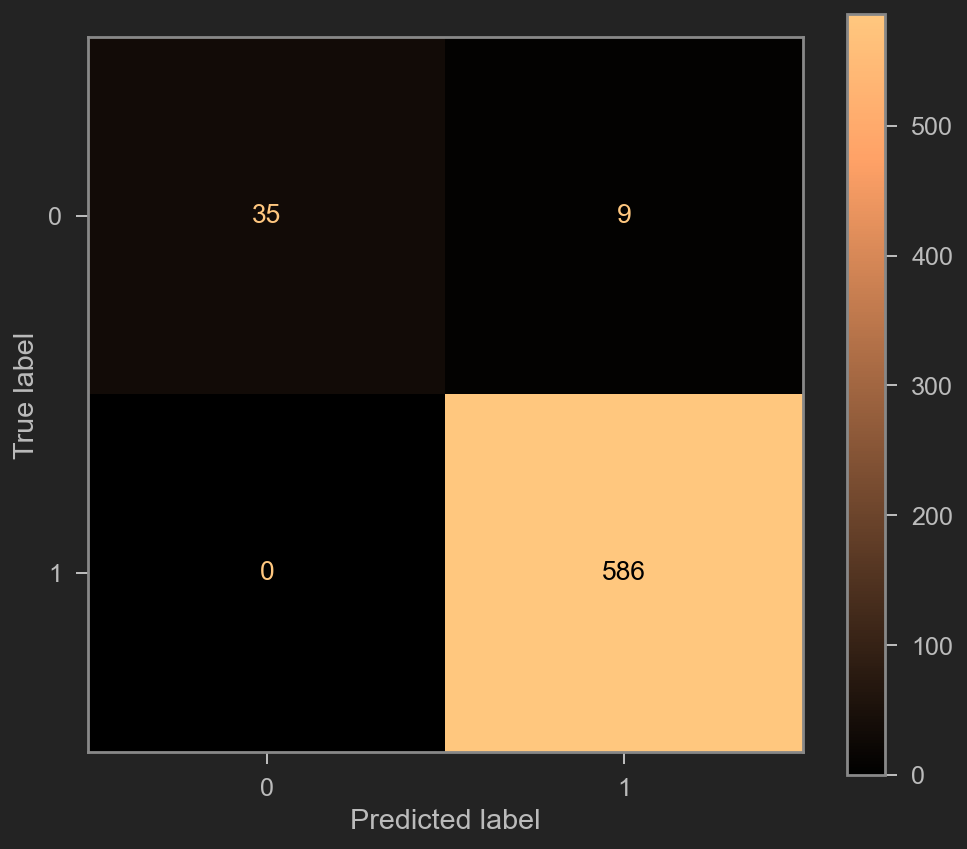

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        44
           1       0.98      1.00      0.99       586

    accuracy                           0.99       630
   macro avg       0.99      0.90      0.94       630
weighted avg       0.99      0.99      0.98       630



In [169]:
from sklearn.svm import SVC
# create and fit model object
svcm = SVC().fit(x_train,y_train)
# predict test sample
y_svcm = svcm.predict(x_test)
# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_svcm,cmap='copper')
plt.show()
# class report
print(classification_report(y_test,y_svcm))

## Conclusion

The support vector machine model has the best accuracy and was able to predict the feedback outcome at an accuracy rate of 99%. Thus the SVM model is recommended for sentiment analysis classification.